In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./dataset/train_label.csv")
df.shape

(1460, 81)

In [3]:
#df = df.loc[df['SalePrice_label'].between(6, 8)]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_label
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,3
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3


<AxesSubplot:ylabel='Frequency'>

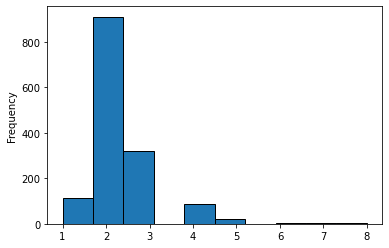

In [40]:
df['SalePrice_label'].plot(kind='hist', edgecolor='black') # 

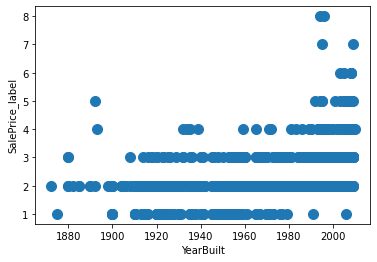

In [44]:
df.plot.scatter(x = 'SalePrice_label', y = 'SalePrice_label', s = 100);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1201 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            91 non-null     object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [5]:
df_num = df.select_dtypes(include='number')

In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   OverallQual      1460 non-null   int64  
 5   OverallCond      1460 non-null   int64  
 6   YearBuilt        1460 non-null   int64  
 7   YearRemodAdd     1460 non-null   int64  
 8   MasVnrArea       1452 non-null   float64
 9   BsmtFinSF1       1460 non-null   int64  
 10  BsmtFinSF2       1460 non-null   int64  
 11  BsmtUnfSF        1460 non-null   int64  
 12  TotalBsmtSF      1460 non-null   int64  
 13  1stFlrSF         1460 non-null   int64  
 14  2ndFlrSF         1460 non-null   int64  
 15  LowQualFinSF     1460 non-null   int64  
 16  GrLivArea        1460 non-null   int64  
 17  BsmtFullBath  

In [7]:
#df_num = df_num.dropna()
#df_num.shape

df_num.fillna(df_num.mean(), inplace=True)
df_num.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


(1460, 38)

In [8]:
df_num = df_num[['LotArea', 'YearBuilt', 'GrLivArea', 'GarageCars','SalePrice_label']]
df_num.head()

,LotArea,YearBuilt,GrLivArea,GarageCars,SalePrice_label
0,8450,2003,1710,2,3
1,9600,1976,1262,2,2
2,11250,2001,1786,2,3
3,9550,1915,1717,3,2
4,14260,2000,2198,3,3


### Discrétiser YearBuilt

<AxesSubplot:ylabel='Frequency'>

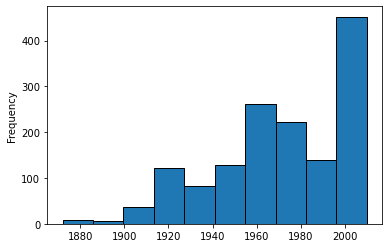

In [9]:
df_num['YearBuilt'].plot(kind='hist', edgecolor='black') #(kind='kde')

In [10]:
df_num_YearBuilt = pd.cut(x      = df_num['YearBuilt'],
                  bins   = [1800, 1910, 1950, 1994, 1996, 2003, 2006, 2008, 2009, 2050],
                  labels = ['ancien+++', 'ancien++', 'ancien+', 'ancien', 'recent', 'recent+', 'recent++', 'recent+++', 'top'])


pd.crosstab(df_num['SalePrice_label'], df_num_YearBuilt)

YearBuilt,ancien+++,ancien++,ancien+,ancien,recent,recent+,recent++,recent+++,top
SalePrice_label,,,,,,,,,
1,10,66,37,0,0,1,0,0,0
2,32,198,498,13,69,83,14,4,0
3,3,23,84,13,91,67,29,10,0
4,1,4,15,3,13,26,22,2,1
5,1,0,2,2,2,7,4,1,0
6,0,0,0,0,1,1,3,0,0
7,0,0,0,1,0,0,0,1,0
8,0,0,1,1,0,0,0,0,0


### Discrétiser GrLivArea

<AxesSubplot:ylabel='Frequency'>

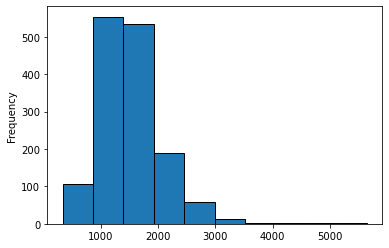

In [11]:
df_num['GrLivArea'].plot(kind='hist', edgecolor='black')

In [12]:
df_num_GrLivArea = pd.cut(x      = df_num['GrLivArea'],
                  bins   = [0, 1000, 2000, 3000, 6000],
                  labels = ['petit', 'moyen', 'moyen+', 'moyen++'])


pd.crosstab(df_num['SalePrice_label'], df_num_GrLivArea)

GrLivArea,petit,moyen,moyen+,moyen++
SalePrice_label,,,,
1,64,49,1,0
2,167,706,35,3
3,0,220,96,4
4,0,39,45,3
5,0,1,14,4
6,0,0,4,1
7,0,0,1,1
8,0,0,0,2


### Discrétiser LotArea

<AxesSubplot:ylabel='Frequency'>

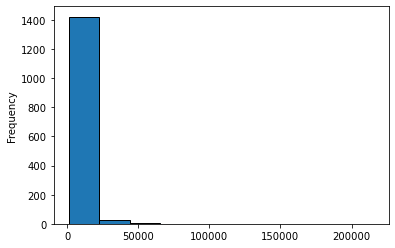

In [13]:
df_num['LotArea'].plot(kind='hist', edgecolor='black')

In [14]:
df_num_LotArea = pd.cut(x      = df_num['LotArea'],
                  bins   = [0, 25000, 300000],
                  labels = ['petit', 'moyen'])


pd.crosstab(df_num['SalePrice_label'], df_num_LotArea)

LotArea,petit,moyen
SalePrice_label,,
1,114,0
2,899,12
3,308,12
4,83,4
5,18,1
6,4,1
7,1,1
8,2,0


### Discrétiser GarageCars

<AxesSubplot:ylabel='Frequency'>

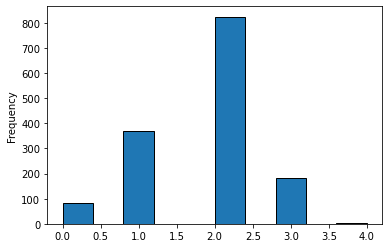

In [15]:
df_num['GarageCars'].plot(kind='hist', edgecolor='black')

In [16]:
df_num_GarageCars = pd.cut(x      = df_num['GarageCars'],
                  bins   = [1, 2, 3, 4, 5],
                  labels = ['petit', 'moyen', 'moyen+', 'grand'])


pd.crosstab(df_num['SalePrice_label'], df_num_GarageCars)

GarageCars,petit,moyen,moyen+
SalePrice_label,,,
1,21,3,0
2,543,17,2
3,233,73,3
4,26,61,0
5,1,18,0
6,0,5,0
7,0,2,0
8,0,2,0


## Dichotomisation

In [17]:
df_YearBuilt_dummies = pd.get_dummies(df_num_YearBuilt, prefix='YearBuilt')

In [18]:
df_GrLivArea_dummies = pd.get_dummies(df_num_GrLivArea, prefix='GrLivArea')

In [19]:
df_LotArea_dummies = pd.get_dummies(df_num_LotArea, prefix='LotArea')

In [20]:
df_GarageCars_dummies = pd.get_dummies(df_num_GarageCars, prefix='GarageCars')

In [21]:
df_GarageCars_dummies.head()

,GarageCars_petit,GarageCars_moyen,GarageCars_moyen+,GarageCars_grand
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [22]:
df_num_prepared = df_num.join(df_YearBuilt_dummies).join(df_GrLivArea_dummies).join(df_LotArea_dummies).join(df_GarageCars_dummies)

In [23]:
df_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LotArea              1460 non-null   int64
 1   YearBuilt            1460 non-null   int64
 2   GrLivArea            1460 non-null   int64
 3   GarageCars           1460 non-null   int64
 4   SalePrice_label      1460 non-null   int64
 5   YearBuilt_ancien+++  1460 non-null   uint8
 6   YearBuilt_ancien++   1460 non-null   uint8
 7   YearBuilt_ancien+    1460 non-null   uint8
 8   YearBuilt_ancien     1460 non-null   uint8
 9   YearBuilt_recent     1460 non-null   uint8
 10  YearBuilt_recent+    1460 non-null   uint8
 11  YearBuilt_recent++   1460 non-null   uint8
 12  YearBuilt_recent+++  1460 non-null   uint8
 13  YearBuilt_top        1460 non-null   uint8
 14  GrLivArea_petit      1460 non-null   uint8
 15  GrLivArea_moyen      1460 non-null   uint8
 16  GrLivArea_moyen+     146

### Evolution du modèle

In [24]:
data = df_num_prepared.iloc[:,4:]

target = df_num_prepared['SalePrice_label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66) 

In [26]:
clf = linear_model.LogisticRegression(C = 1.0, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 22   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0]
 [  0   0  57   0   0   0   0]
 [  0   0   1  15   0   0   0]
 [  0   0   0   3   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   0   0   1   0   0]]


In [28]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,22,0,0,0,0
2,0,192,0,0,0
3,0,0,57,0,0
4,0,0,1,15,0
5,0,0,0,3,0
6,0,0,0,1,0
7,0,0,0,0,1


In [29]:
clf.score(X_test, y_test)

0.9794520547945206

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       192
           3       0.98      1.00      0.99        57
           4       0.79      0.94      0.86        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.98       292
   macro avg       0.54      0.56      0.55       292
weighted avg       0.97      0.98      0.97       292



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Courbe ROC

In [31]:
probs = clf.predict_proba(X_test)

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

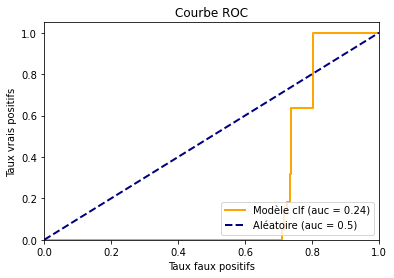

In [33]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## SVM

In [34]:
from sklearn import svm

In [35]:
clf = svm.SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train, y_train)

SVC(gamma=0.01, kernel='poly')

In [36]:
clf.score(X_test, y_test)

0.6575342465753424